# 6) Design a model for MNIST hand written digit classification using Deep Convolution Neural networks.

In [1]:
#Importing Packages
import keras
from keras.models import Sequential
from keras.layers import Dense , Flatten
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [2]:
#Import the Dataset
from keras.datasets import mnist
(train_img , train_lab) , (test_img , test_lab) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalize Dataset
train_img = keras.utils.normalize(train_img , axis=1)
test_img = keras.utils.normalize(test_img , axis=1)

In [4]:
#Building the Model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
#Summary of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Compiling the Model
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [7]:
#Fitting Model
model.fit(train_img , train_lab , epochs=10)
model.save('model.h5')

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2226 - accuracy: 0.9332
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0896 - accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0617 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0470 - accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0295 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0248 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

In [8]:
#Evaluation of Model
print(model.evaluate(test_img , test_lab))

313/313 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9768
[0.10285540670156479, 0.9768000245094299]


In [9]:
#Predict the First 10 images
pred = model.predict(test_img[:10])
#print(pred)
p = np.argmax(pred , axis=1)
print(p)
print(test_lab[:10])

1/1 [==============================] - 0s 100ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


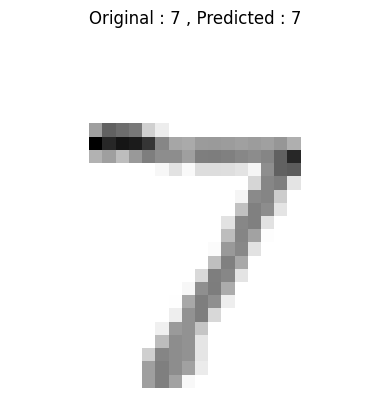

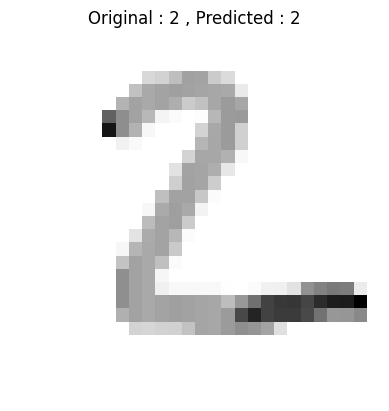

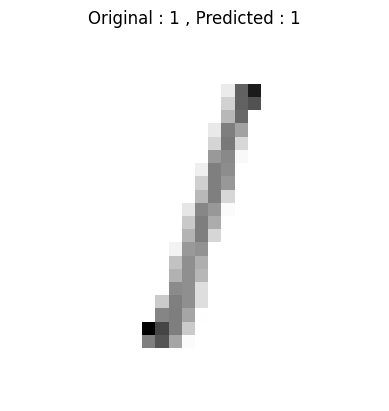

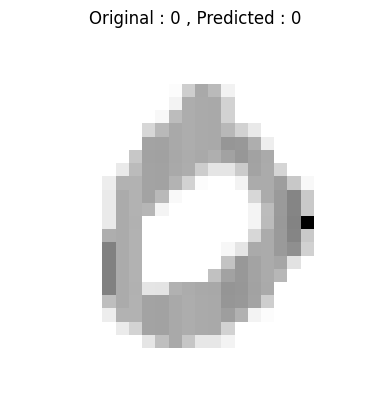

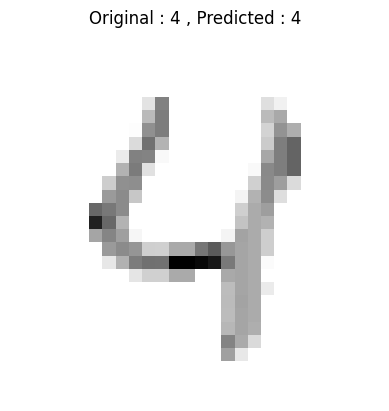

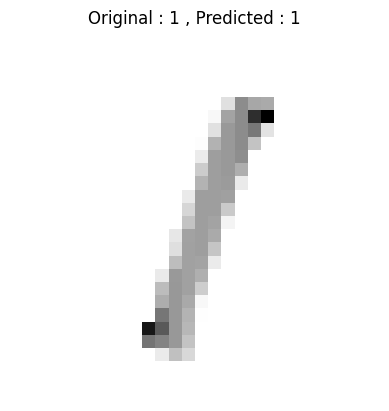

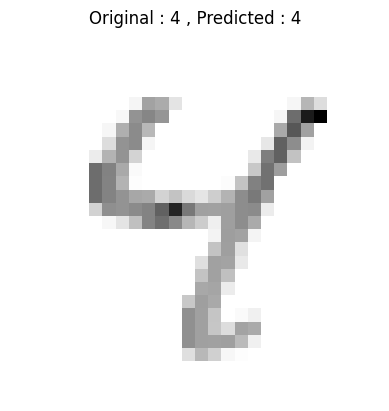

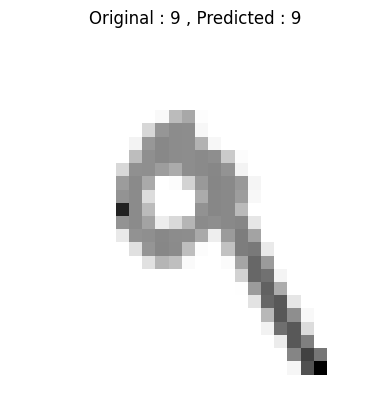

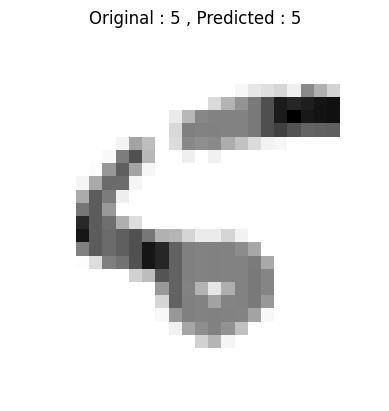

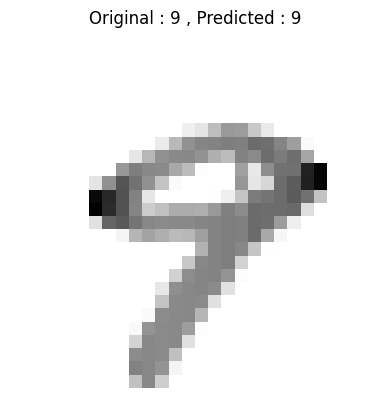

<Figure size 640x480 with 0 Axes>

In [10]:
#Visualizing Prediction
for i in range(10):
  plt.imshow(test_img[i] , cmap = 'binary')
  plt.title("Original : {} , Predicted : {}".format(test_lab[i] , p[i]))
  plt.axis("off")
  plt.figure()